In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import  RMSprop
import pytesseract
import pyttsx3

In [12]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [21]:
train_dataset=train.flow_from_directory("E:/computer_vision/basedata/training/",target_size=(640,480),batch_size=3,class_mode="binary")

Found 18 images belonging to 2 classes.


In [22]:
validation_dataset=train.flow_from_directory("E:/computer_vision/basedata/validation/",target_size=(640,480),batch_size=3,class_mode="binary")

Found 13 images belonging to 2 classes.


In [23]:
train_dataset.class_indices

{'exist': 0, 'non_exist': 1}

In [24]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape =(640,480,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                               tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                  tf.keras.layers.MaxPool2D(2,2),
                                 #
                                  tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                  tf.keras.layers.MaxPool2D(2,2),
                                 ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation="relu"),
                                  ##
                                  tf.keras.layers.Dense(1,activation="sigmoid")
                                 
                                 
                                 
                                                        ])

In [25]:
model.compile(loss="binary_crossentropy",
             optimizer=RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

In [26]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=30,
                    validation_data=validation_dataset
                   )

Epoch 1/30
3/3 [==============================] - 8s 3s/step - loss: 85.0292 - accuracy: 0.6667 - val_loss: 3.8214 - val_accuracy: 0.6154
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 5.8764 - accuracy: 0.5556 - val_loss: 1.3762 - val_accuracy: 0.3846
Epoch 3/30
3/3 [==============================] - 6s 2s/step - loss: 1.4034 - accuracy: 0.5556 - val_loss: 0.8566 - val_accuracy: 0.6154
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 3.0834 - accuracy: 0.1111 - val_loss: 0.8176 - val_accuracy: 0.3846
Epoch 5/30
3/3 [==============================] - 6s 2s/step - loss: 0.7607 - accuracy: 0.4444 - val_loss: 0.7905 - val_accuracy: 0.6154
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 0.7149 - accuracy: 0.4444 - val_loss: 0.6688 - val_accuracy: 0.6923
Epoch 7/30
3/3 [==============================] - 6s 2s/step - loss: 0.5835 - accuracy: 0.7778 - val_loss: 0.7240 - val_accuracy: 0.3846
Epoch 8/30
3/3 [========================

1/1 [==============================] - 0s 166ms/step
[[1.]]
non_exist


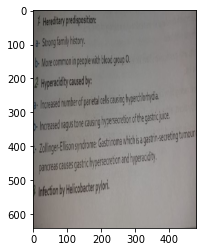

In [27]:
dir_path="E:/computer_vision/basedata/testing"
#for i in os.listdir(dir_path):
img=image.load_img("E:/computer_vision/basedata/testing/non_exist/5.jpg",target_size=(640,480))
plt.imshow(img)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
print(val)
if val==0:
    print("exist")
elif val==1:
    print("non_exist")
    

In [28]:

def click_event(event, xPos, yPos, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:

        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        ima=np.vstack([x])
        val=model.predict(ima)
        
        if val==0:
            print('exist')
            boxes = pytesseract.image_to_data(img)
            for x, y in enumerate(boxes.splitlines()):
                if x != 0:
                    y = y.split()
                    if len(y) == 12:
                        x_axis, y_axis, w, h = int(y[6]), int(y[7]), int(y[8]), int(y[9]) 
                        if xPos >= x_axis and xPos <= x_axis + w:
                            if yPos >= y_axis and yPos <= y_axis + h:
                                the_word = y[11]

                                engine = pyttsx3.init()
                                voices = engine.getProperty('voices')
                                engine.setProperty('voice', voices[1].id)
                                engine.say(the_word)
                                engine.runAndWait()

                                print(the_word)
                                cv2.rectangle(img, (x_axis, y_axis), (w + x_axis, h + y_axis), (0, 255, 0), 3)
                                cv2.imshow("Image", img)
                                cv2.waitKey(100)
        elif val==1:
            print('not exist')

cap=cv2.VideoCapture("https://192.168.1.11:8080/video")


while(cap.isOpened()):
    ret,img=cap.read()
    if ret :
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                
        #img = cv2.cvtColor(img,1)
        img = cv2.resize(img, (640, 480))
        cv2.imshow('Image',img)
        cv2.setMouseCallback('Image',click_event) 

        k=cv2.waitKey(1)
        if k == 27:
            cv2.destroyAllWindows()
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 280ms/step
exist
1/1 [==============================] - 0s 128ms/step
exist
1/1 [==============================] - 0s 128ms/step
exist
1/1 [==============================] - 0s 256ms/step
exist
1/1 [==============================] - 0s 136ms/step
exist
1/1 [==============================] - 0s 136ms/step
exist
1/1 [==============================] - 0s 152ms/step
exist
Neuroscience
1/1 [==============================] - 0s 128ms/step
not exist
1/1 [==============================] - 0s 151ms/step
not exist
1/1 [==============================] - 0s 200ms/step
not exist
1/1 [==============================] - 0s 128ms/step
not exist
1/1 [==============================] - 0s 128ms/step
not exist
1/1 [==============================] - 0s 128ms/step
exist
1/1 [==============================] - 0s 128ms/step
exist
1/1 [==============================] - 0s 128ms/step
exist
some
1/1 [==============================] - 0s 272ms/step
exist
1/1 [=============